# Project 2
 

In [75]:
#imprting of libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns; 
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings("ignore")

In [76]:
#Dataset Acqusition
df = pd.read_csv('Wholesale customers data.csv')


## 1. Exploratory Data Analysis EDA

In [77]:
# Checking the shape of the Data (Rows, COlumns)
df.shape

(440, 8)

In [78]:
## Cheking the first 6 rows of the Acquired Data
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [79]:
## CHecking of the data values

print("Channel unique values:",df['Channel'].unique())
print("Region unique values",df['Region'].unique())

Channel unique values: [2 1]
Region unique values [3 1 2]


In [80]:
# Information of the Data Frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [81]:
# Description of the Data

df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [82]:
## How many null values in the columns of the DataFrame

df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [83]:
## Chategorical and Continous Features

categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [84]:
## Counting the number of instances of the classes

df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

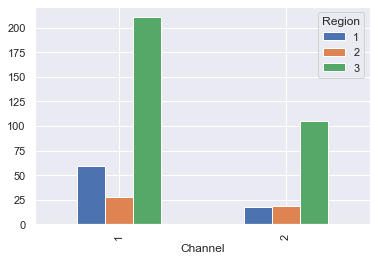

Region    1   2    3
Channel             
1        59  28  211
2        18  19  105


In [85]:
def categorical_multi(i,j):
    pd.crosstab(df[i],df[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(df[i],df[j]))

## Printing the Number of regions
categorical_multi(i='Channel',j='Region')   
X = df.iloc[:, 2: 8].values

In [86]:
## Evaluating the Correlaton

df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Text(111.453125, 0.5, 'Features')

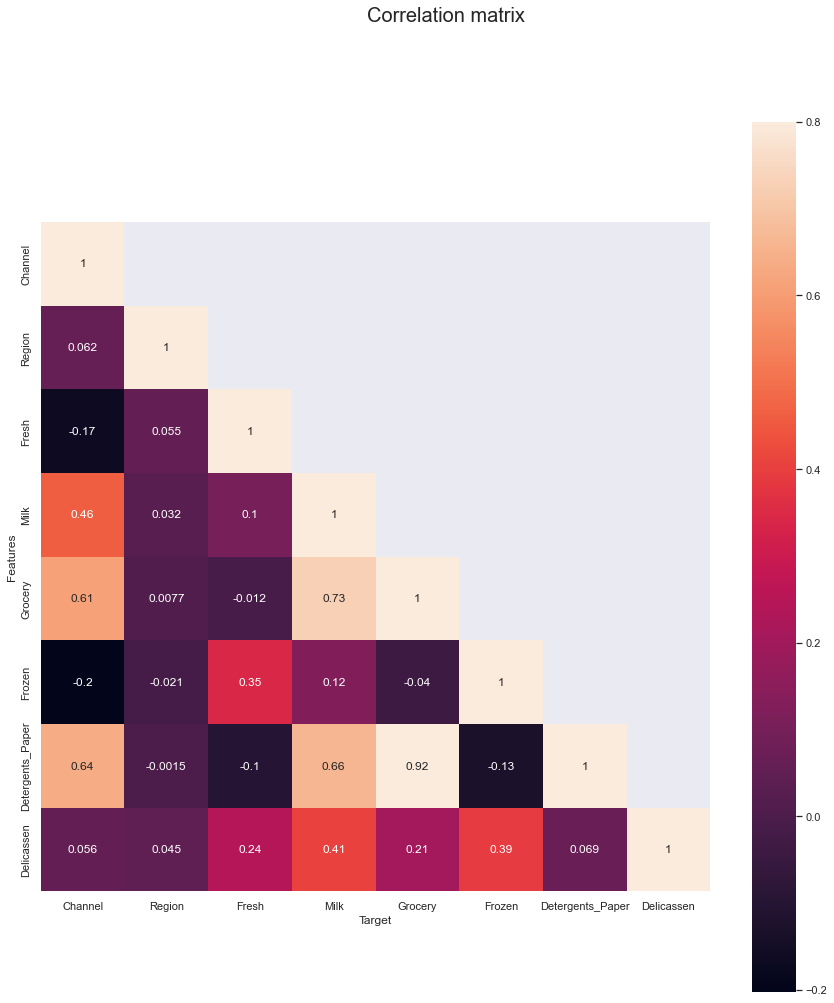

In [87]:
# Correlation analysis
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,16)
fig.suptitle('Correlation matrix', fontsize=20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.xlabel('Target')
plt.ylabel('Features')



## 2. implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler and StandardScaler

Text(0, 0.5, 'Observations')

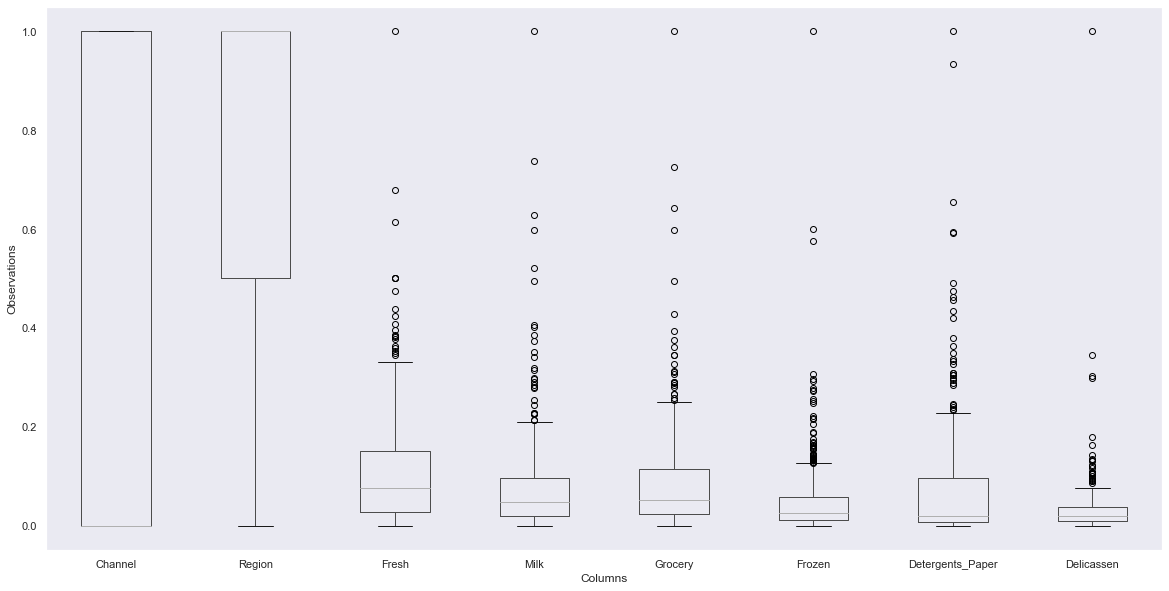

In [88]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled, columns = [name for name in list(df)])
fig = plt.figure(figsize = (20,10))
scaled_data.boxplot(column=[name for name in list(scaled_data)], grid=False)
plt.xlabel('Columns')
plt.ylabel('Observations')

In [89]:
df1 = df.copy()

In [90]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit_transform(df1)
scaled_frame = pd.DataFrame(std_scale, columns=df1.columns)
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [91]:
scaled_frame.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Text(0.5, 1.0, 'Description of the Data')

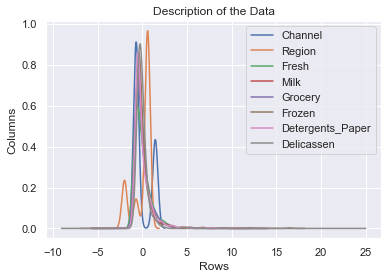

In [92]:
pd.DataFrame(scaled_frame).plot(kind='kde')
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title("Description of the Data")



Text(0.5, 1.0, 'Description of the Data')

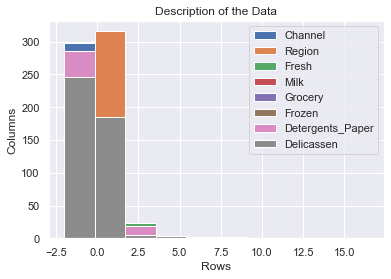

In [93]:
pd.DataFrame(scaled_frame).plot(kind='hist', bins=10)
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title("Description of the Data")

In [94]:
df2 = df.copy()

In [95]:
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler().fit_transform(df)

scaled_frame2 = pd.DataFrame(minmax_scale,columns=df.columns)

scaled_frame2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [96]:
scaled_frame2.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Description of the Data')

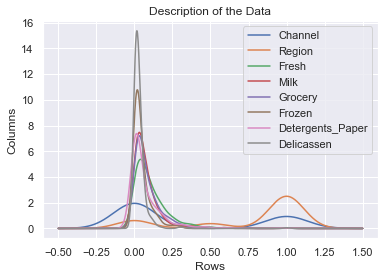

In [97]:
pd.DataFrame(scaled_frame2).plot(kind='kde')
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title("Description of the Data")

Text(0.5, 1.0, 'Description of the Data')

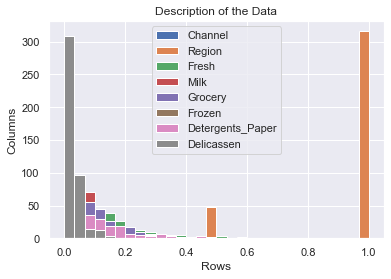

In [98]:
pd.DataFrame(scaled_frame2).plot(kind='hist', bins=30)
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title("Description of the Data")

Ans: In Standardscaler, it assumes that data has normally distributed features and it has scaled them to zero mean and 1 standard deviation and all the features are of the same scale after applying the scaler.
In Minmaxscaler, it shrinks the data within the range of -1 to 1(if there are negative values) and responds well if standard deviation is small and is used when distribution is not Gaussian.This scaler is sensitive to outliers.
In Standard scaler, centered curves are there with no outliers and in minmax, outliers are there.

So here, we will continue with standard scaler.

In [99]:
df_Con=df.drop(['Channel','Region'], axis=1)  # drop Categorical features

In [100]:
df_Con.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

<Figure size 720x576 with 0 Axes>

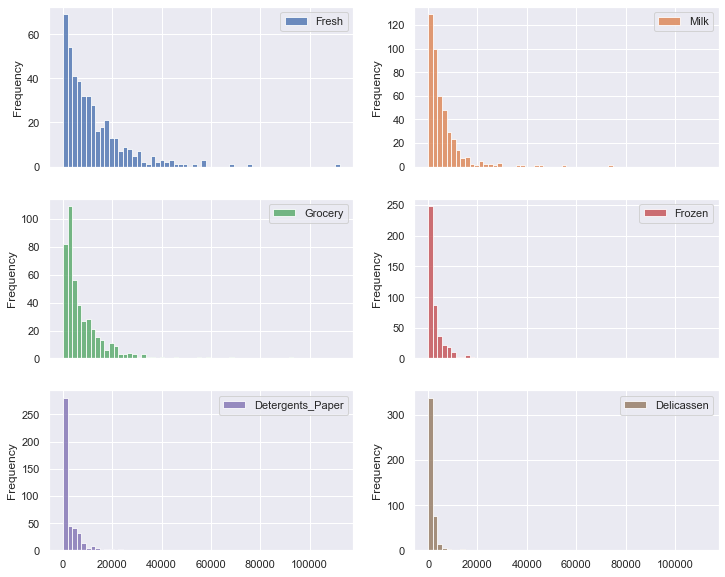

In [101]:
# Histogram

plt.figure(figsize=(10,8))
df_Con.plot(kind='hist', alpha=0.8,bins=60, xlabel = "4", ylabel = "s", subplots=True,layout=(3,2),legend=True,figsize=(12,10))

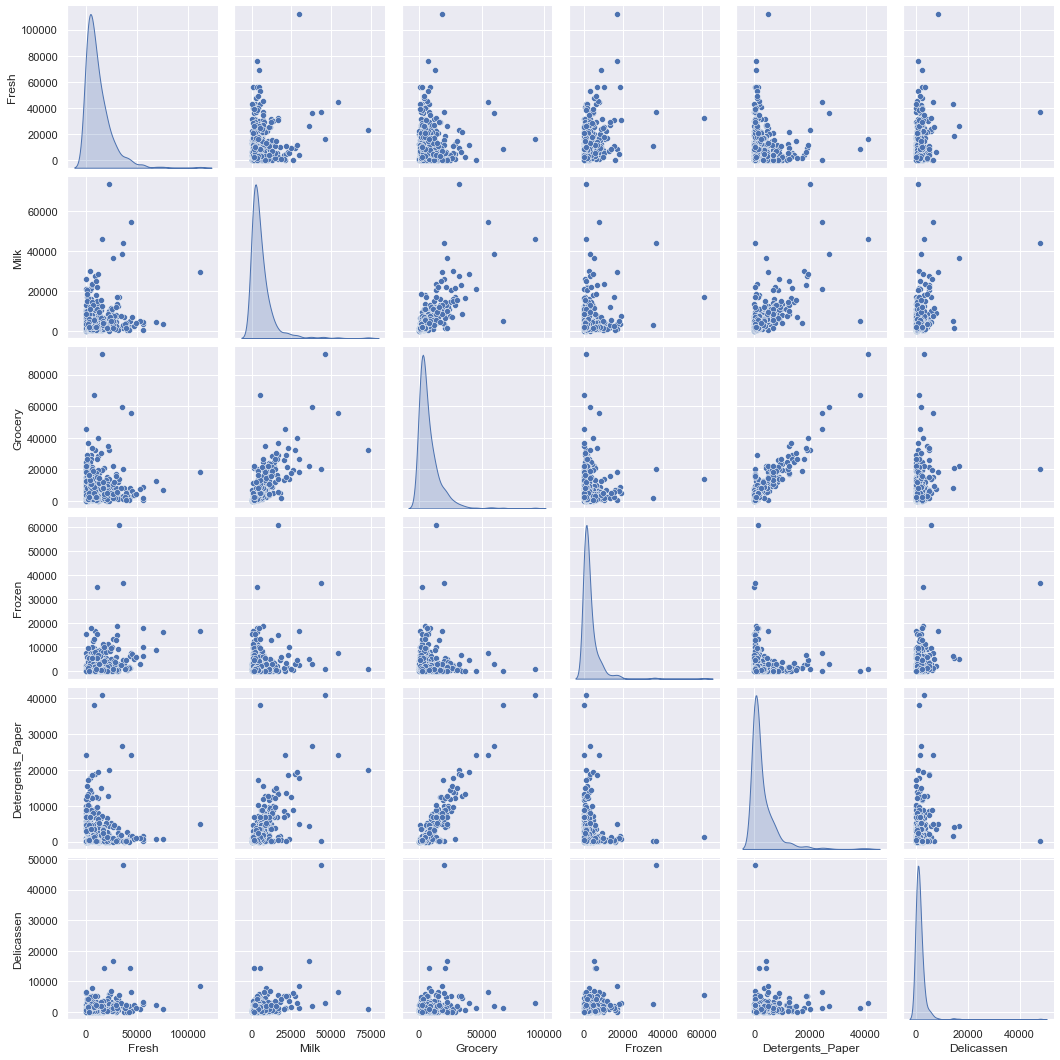

In [102]:
plot1=sns.pairplot(df_Con, diag_kind='kde')

In [103]:
mean_df=df.describe().loc['mean',:]
mean_df

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Name: mean, dtype: float64

In [104]:
X = scaled_frame.drop(['Channel'], axis=1)
y = df['Channel'] # Channel has 2 values so we will use channel here from main table

# convert channel into binary values
y[y == 2] = 0
y[y == 1] = 1

y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

lr, knn = LinearRegression(), KNeighborsClassifier()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [107]:
print("Fit raw features:")
print(" LR:", lr.fit(X_train, y_train).score(X_test, y_test))
print("KNN:", knn.fit(X_train, y_train).score(X_test, y_test))
print("GBC: ", GradientBoostingClassifier().fit(X_train, y_train).score(X_test, y_test))
print("RFC: ", RandomForestClassifier().fit(X_train, y_train).score(X_test, y_test))

Fit raw features:
 LR: 0.26124123681110123
KNN: 0.9
GBC:  0.9090909090909091
RFC:  0.9


## 3. Implement RFECV and show the plot between the Number of features selected vs Cross-Validation score.

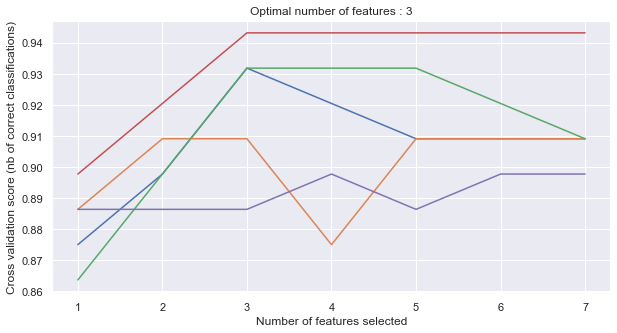

In [108]:
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf)
rfecv.fit(X, y)

plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

In [109]:
model = GradientBoostingClassifier()
rfecv = RFECV(estimator=GradientBoostingClassifier())

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np

In [111]:
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
n_scores = cross_val_score(pipeline, X,y, scoring='accuracy', cv=cv, n_jobs = -1)
np.mean(n_scores)

0.9013636363636363

In [112]:
pipeline.fit(X,y)

Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=GradientBoostingClassifier())),
                ('Model', GradientBoostingClassifier())])

In [113]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 5


In [114]:
rfecv.support_

array([False, False,  True,  True,  True,  True,  True])

In [115]:
rfecv_df = pd.DataFrame(rfecv.ranking_, index=X.columns, columns = ['Rank']).sort_values(by='Rank', ascending=True)
rfecv_df.head(10)

,Rank
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1
Delicassen,1
Fresh,2
Region,3


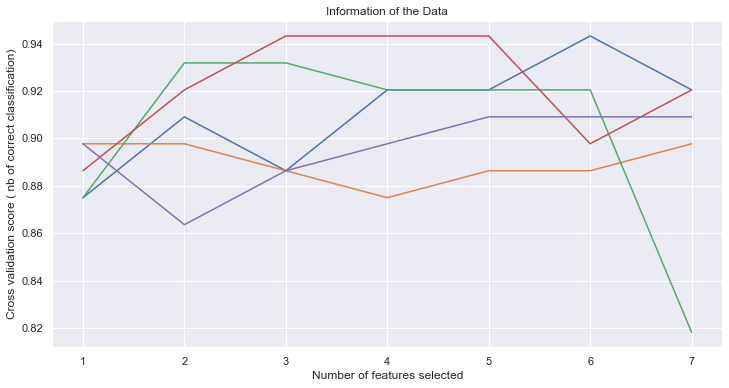

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Information of the Data")
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score ( nb of correct classification)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## 4. Use elbow plot to determine the optimal number of clusters

So Milk, Grocery, Frozen, Detergents_Paper and Delicassen are optimal features.

In [117]:
from sklearn.cluster import KMeans
X = df.iloc[:, 2: 8].values

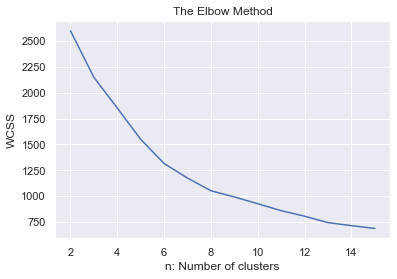

In [118]:
wcss = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_frame) # Standard scaler 
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    # silhouette score
#     silhouette_avg = silhouette_score(df, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))
plt.plot(range(2, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('n: Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [119]:
kmeans = KMeans(n_clusters = 3,random_state = 111)
y_means = kmeans.fit(scaled_frame)

In [120]:
y_means

KMeans(n_clusters=3, random_state=111)

In [121]:
print('SSE: ', kmeans.inertia_)
print('\nCentroids: \n', kmeans.cluster_centers_)

SSE:  2149.283956221759

Centroids: 
 [[ 1.44865163e+00  1.03304786e-01 -3.03522355e-01  4.00468697e-01
   6.27264086e-01 -3.36203224e-01  6.52954644e-01  3.59872191e-03]
 [-6.83095239e-01 -4.93039862e-02  8.51425337e-02 -3.49638303e-01
  -4.31460809e-01  1.13106103e-01 -4.41920675e-01 -1.00330630e-01]
 [ 1.11958260e+00  9.33585924e-02  1.09004412e+00  3.98320348e+00
   3.58457916e+00  7.77992824e-01  3.56664129e+00  2.25618179e+00]]


In [122]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

1    297
0    130
2     13
dtype: int64

## 5. Implement KMeans Clustering and PCA

In [123]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(X)


[[12669  9656  7561   214  2674  1338]
 [ 7057  9810  9568  1762  3293  1776]
 [ 6353  8808  7684  2405  3516  7844]
 ...
 [14531 15488 30243   437 14841  1867]
 [10290  1981  2232  1038   168  2125]
 [ 2787  1698  2510    65   477    52]]


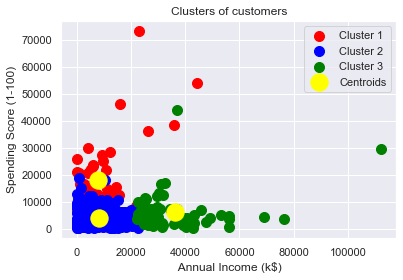

In [124]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0] , X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0] , X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0] , X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300,c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel(' Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 6. Calculate variance explained by the first 2 components and by the first 4 components in PCA and visualize the clusters in the data using PCA: 

In [125]:
pca2 = PCA(n_components=2).fit(scaled_frame)
pca2d = pca2.transform(scaled_frame)

print("Explained variance is:",pca2.explained_variance_)
print("Explained variance ratio",pca2.explained_variance_ratio_)
print("Variance for 1st component is 38.75% & 2nd component is 22.37%")

Explained variance is: [3.10707136 1.79404441]
Explained variance ratio [0.38750123 0.22374588]
Variance for 1st component is 38.75% & 2nd component is 22.37%


Explained variance is: [3.10707136 1.79404441 1.0140786  0.74007428]
Explained variance ratio is: [0.38750123 0.22374588 0.12647173 0.09229904]


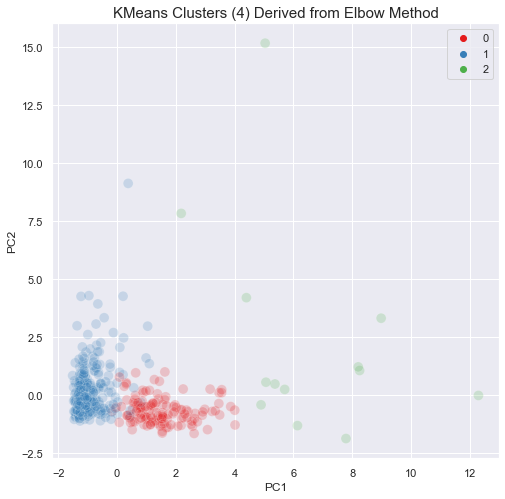

In [126]:
pca4 = PCA(n_components=4).fit(scaled_frame)
pca4d = pca4.transform(scaled_frame)

print("Explained variance is:",pca4.explained_variance_)
print("Explained variance ratio is:",pca4.explained_variance_ratio_)

plt.figure(figsize = (8,8))
sns.scatterplot(pca4d[:,0], pca4d[:,1], 
                hue=y_means.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Elbow Method', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [127]:
# convert labels into binary values

y[y == 2] = 0

y[y == 1] = 1

In [128]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

In [138]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
X = df.iloc[:, 2: 8].values

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [130]:
# CV model
model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [131]:
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
Accuracy = results.mean()*100

Accuracy: 91.36% (3.18%)


## 7. Implement XGBoost Classifier with 5 Fold CV and report the performance metrics(precision, recall, and accuracy)

In [132]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)

model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)


In [133]:
PW = cross_val_score(model, X, y, cv=kfold, scoring='precision_weighted')
Rscore = cross_val_score(model, X, y, cv=kfold, scoring='recall_weighted')

In [134]:
Recall = (round((Rscore.mean()*100),3))
Precision = (round((PW.mean()*100),3))

f1score=round(2*((Recall*Precision)/(Recall+Precision)),3)

In [135]:
print("Accuracy= %f, Recall=%f, Precision=%f, f1score=%f" % (Accuracy,Recall,Precision,f1score))

Accuracy= 91.363636, Recall=91.364000, Precision=91.924000, f1score=91.643000


## 8.  Provide observations and reasoning for visualizations and results included.

First we have a graph of the categorical observations, which shows the number of instances in each categorical variable. 
Then we have a graph of the correlation matrix. The graph represents the relation between multi-variables. The cell with the Light fill color has a lessor correlation, and the dark cell has a high correlation ratio.
The third graph is a box plot, and it shows the statistical information like the standard deviation, mean, and more of each column.
In the following four graphs, two data processing methods are compared where the standard scaler is preferred over the Minmaxscaler. 
Afterward, we have a histogram and a pair plot of the acquired dataset. These graphs show the column's properties, lowest, highest instance, and other properties.

The most important graph is the Elbow method graph. It shows the graph line of the number of clusters and the WCSS. The elbow in the graph depicts the optimal number of clusters. It is said that the 3 is an optimal number of clusters. 
Thus, we have 3 clusters in the whole dataset. In the immediate next figure, three different clusters are plotted in three colors (Red, Blue, and Green). Thus, the whole dataset is divided and merged into their respective clusters.

We calculated the variance of the PCA-2 and PCA-4 and a plot of between these two variant is plotted in the next figure. It shows the 3 clusters within their range. The PCA classify the data into different vectors or plane. So, the acquired plot can be 2D, 3D, 4D, or more. 

### Accuracy= 91.363636, Recall=91.364000, Precision=91.924000, f1score=91.643000

Here, we have accuracy 91 points, means our model is 91 percent accurate.
Then we have Precision should ideally be 1 (high) for a good classifier. It shows all the positive results of the model while it is actual existed or the predicted positive.  Our model has 91 points of recall means our model is almost a good classifer model.  

Recall means True Negatives values of the predicted data is divided by actual YES. In our case, we have 91 points of recall score. Finally we have the F1 score, It is a measurment of a model’s accuracy. It is used to evaluate binary classification systems, which classify the model into ‘positive’ or ‘negative’. Our model has 91 score of F1. The above accuracy is an cummulative accuracy of the model because 5 different sub-datasets are implemented over the model. 




In [144]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model = XGBClassifier(eval_metric='mlogloss')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

In [145]:
acc

0.9318181818181818